<a href="https://colab.research.google.com/github/Souha-Kabtni/Food-Sales-Predictions-Revisited-/blob/main/%22Explaining_Models_with_Shap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import my to be used packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

# Models & evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression  # For model creation (Regression in this case)
from sklearn.tree import DecisionTreeRegressor # For model creation (Decision Tree in this case)
from sklearn.ensemble import RandomForestRegressor # For model creation (random forest Regressor in this case)

## Serialize the Best Models with Joblib
import joblib

from sklearn import set_config
set_config(transform_output='pandas')
pd.set_option('display.max_columns', 100)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # For model evaluation (using Regression metrics)

from sklearn.model_selection import GridSearchCV   # Used for model tuning

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Upload the file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Your Saved Joblib File

In [ ]:
loaded = joblib.load('/content/drive/MyDrive/Final project/best-models.joblib')
loaded.keys()

dict_keys(['preprocessor', 'X_train', 'X_test', 'y_train', 'y_test', 'LinearRegression', 'RandomForestRegressor'])

In [ ]:
X_train_df = loaded['X_train']
y_train = loaded['y_train']
X_test_df = loaded['X_test']
y_test = loaded['y_test']
preprocessor = loaded['preprocessor']
loaded_model = loaded['RandomForestRegressor']

# **Global Explanations**

# Explain your tree-based model with shap

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 5.6 MB/s eta 0:00:00


In [ ]:
# Import and init shap
import shap
shap.initjs()

In [ ]:
# Create an X_shap and y_shap variable from your training data (use shap.sample as needed)
X_shap = shap.sample(X_train_df,nsamples = 500,random_state=321)
y_shap = y_train.loc[X_shap.index]
X_shap.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Establishment_Year
7579,11.600000,0.037640,98.4042,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1999
7592,12.904458,0.034718,179.4344,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1985
7928,20.200000,0.060045,128.3678,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2009
8271,12.904458,0.057835,57.5562,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1985
2096,16.600000,0.026645,53.5614,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2009


In [ ]:
# Create a model explainer
explainer = shap.Explainer(loaded_model)

## Calculate the shap values for your model
shap_values = explainer(X_shap,y_shap)

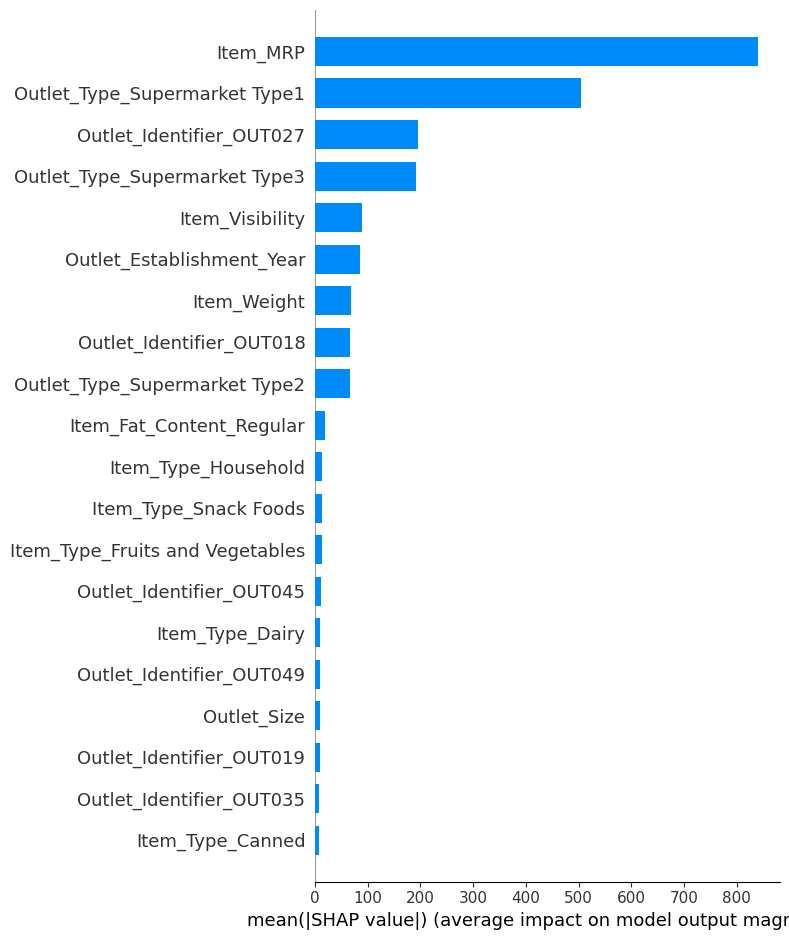

In [ ]:
## Create a summary plot - with plot_type='bar'
shap.summary_plot(shap_values, features = X_shap, plot_type='bar')

display your saved feature importance image (that you used in your README) and compare the most important features according to SHAP vs. your original feature importances.
Are they the same features in both? If not, what's different?

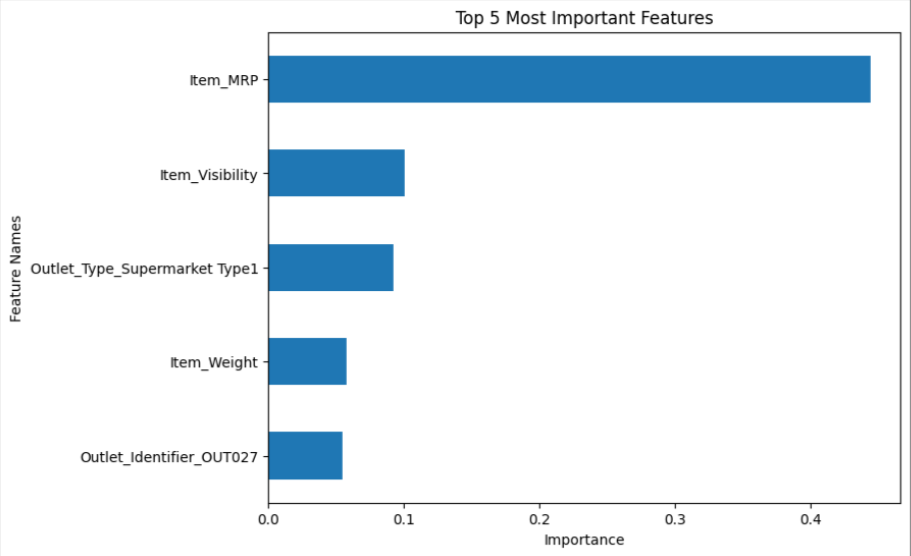

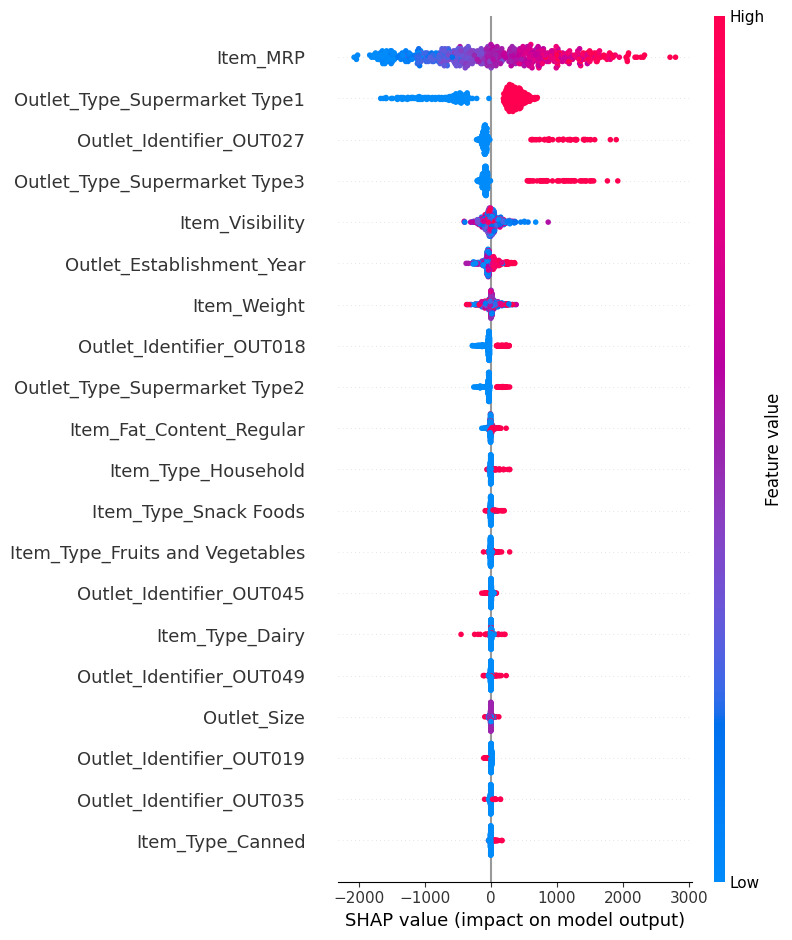

In [ ]:
## Create a summary plot - with plot_type='bar'
shap.summary_plot(shap_values, features = X_shap)

n a markdown cell, interpret the top 3 most important features and how they influence your model's predictions.

# **Local Explanations**